Sample Data:
   Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0   1.125100   1.178124   0.493516   0.790880  -0.614278   1.347020   
1  -0.564641   3.638629  -1.522415  -1.541705   1.616697   4.781310   
2   0.516313   2.165426  -0.628486  -0.386923   0.492518   1.442381   
3   0.537282   0.966618  -0.115420   0.670755  -0.958516   0.871440   
4   0.278385   1.065828  -1.724917  -2.235667   0.715107   0.731249   

   Feature_7  Feature_8  Feature_9  Feature_10  Churn  
0   1.419515   1.357325   0.966041   -1.981139      1  
1   3.190292  -0.890254   1.438826   -3.828748      0  
2   1.332905  -1.958175  -0.348803   -1.804124      0  
3   0.508186  -1.034471  -1.654176   -1.910503      1  
4  -0.674119   0.598330  -0.524283    1.047610      0  

Accuracy: 89.67%

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.94      0.91       158
       Churn       0.92      0.85      0.89       142

    accuracy      

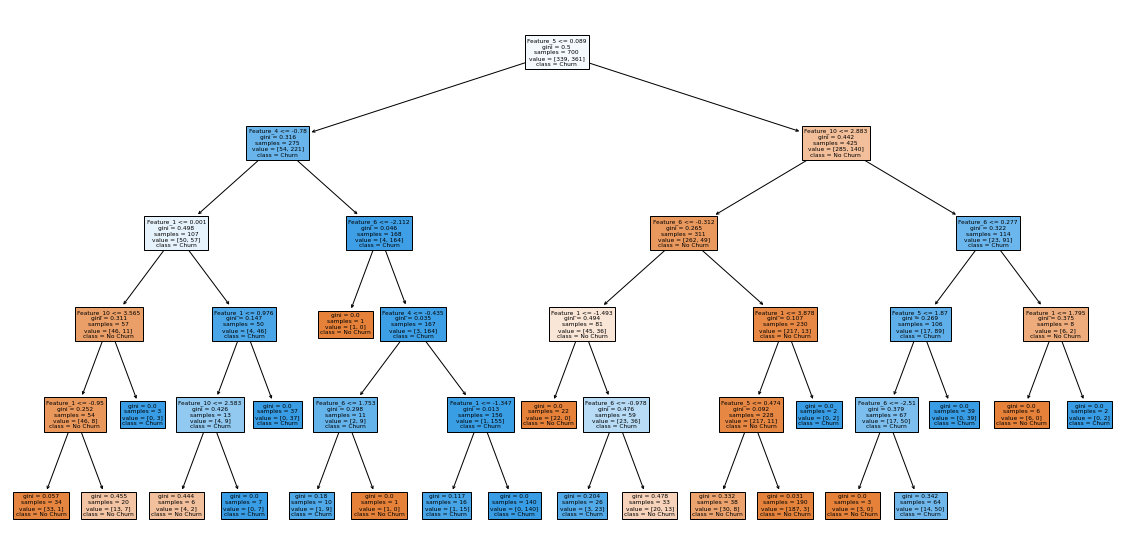

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

# Generate a synthetic dataset
# For demonstration, let's create a synthetic dataset resembling customer churn
from sklearn.datasets import make_classification

# Generate a synthetic binary classification dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, n_classes=2, random_state=42)

# Convert the dataset into a pandas DataFrame
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Churn'] = y

# Display the first few rows of the dataset
print("Sample Data:")
print(df.head())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Churn']), df['Churn'], test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=5, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=df.columns[:-1], class_names=["No Churn", "Churn"], filled=True)
plt.show()
